## Exploratory Data Analysis: Кредитный Скоринг

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv", sep=",")
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
data.shape

(1000, 21)

In [5]:
data.isna().any().any()

False

Пропусков в данных нет.

In [6]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

Количественные признаки: duration, amount, age

Категориальные: purpose, personal_status_sex, other_debtors, other_installment_plans, housing

Порядковые: status, savings, credit_history, property, job, employment_duration, installment_rate, present_residence, number_credits

Бинарные: people_liable, telephone, foreign_worker, credit_risk

Обоснуем такое разделение. Количественными мы считаем те признаки, которые по типу представляют собой целое число. Бинарные признаки - те, которые принимают только два значения. Что касается разделения на порядковые и категориальные признаки, мы пользовались такой логикой: если в контексте кредитного скоринга значения признанка с определённой степенью влияют на надежность клиента, то этот признак порядковый. Например, хоть работа и вне контекста будет категориальным признаком, для нашей задачи полезно считать ее порядковым - более квалифицированные сотрудники будут более надёжными клиентами. Таким образом порядковые признаки - это размеры сберегательного и рассчётного счетов (чем больше, тем надёжнее клиент), кредитная история (чем лучше, тем надёжнее), собственность (чем дороже собственность, тем клиент надёжнее), работа (более квалифицированные работники более надежные заёмщики), а также employment_duration, installment_rate, present_residence, number_credits, которые представляют собой интевалы чисел - мы также можем расставить их по порядку. Все остальные признаки мы считаем категориальными, потому что не можем точно сказать, какая цель кредита чаще встречается у надёжных заёмщиков, personal_status_sex тоже нельзя расставить по порядку. Для переменной other_debtors не совсем ясно, какой поручитель надёжнее, аналогично и с other_installment_plans и housing.

In [7]:
gr = data.groupby(by='purpose')
gr['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

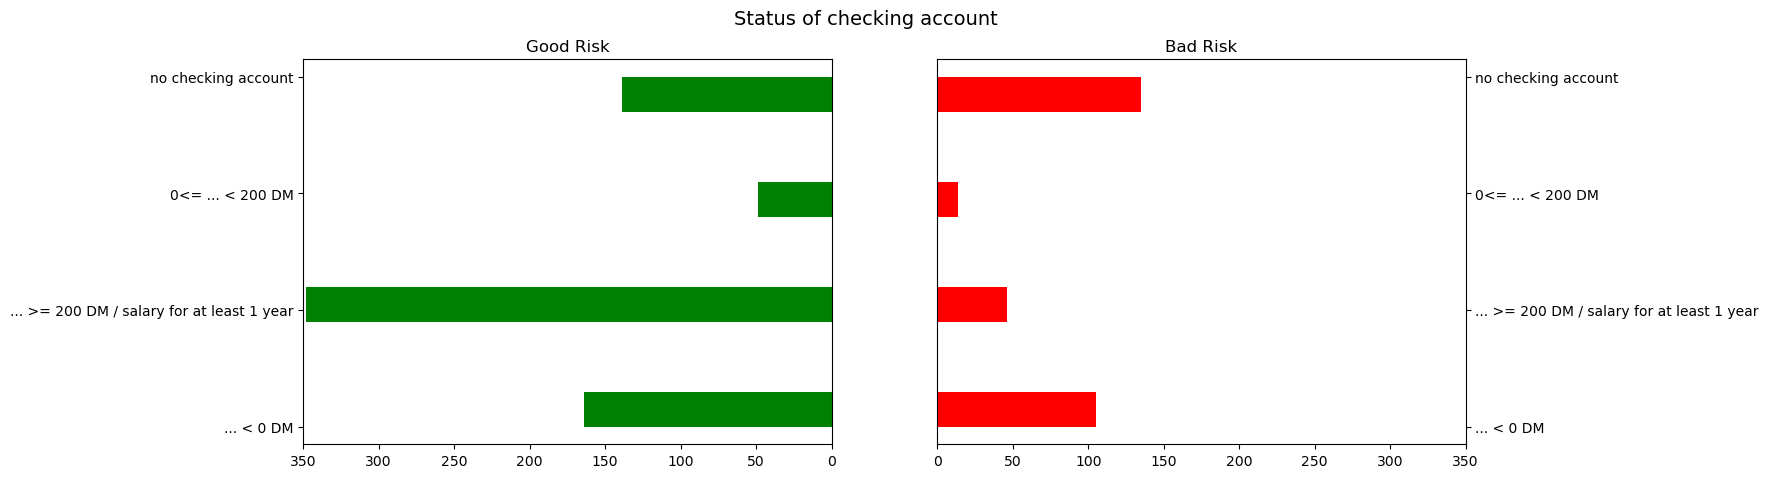

In [12]:
Good = data[data['credit_risk']  == 'good']
Bad = data[data['credit_risk']  == 'bad']
goodcredit = Good['status']
badcredit = Bad['status']
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Status of checking account', fontsize= 14)

ax[0].set_xlim([0, 350])
ax[0].hist(sorted(goodcredit), orientation= 'horizontal', color='g')
ax[0].set_xlim(ax[0].get_xlim()[::-1])
ax[0].set_title('Good Risk')
ax[0].yaxis.tick_left()

ax[1].hist(sorted(badcredit), orientation= 'horizontal', color='r')
ax[1].yaxis.tick_right()
ax[1].set_title('Bad Risk')
ax[1].set_xlim([0, 350])
plt.show()

Проинтерпретируем получившуюся гистограмму. Рассмотрим левый график, который отражает распределение людей с хорошим кредитным риском (то есть тех, кто вероятнее вернёт кредит) в зависимости от состояния рассчётного счёта. Больше всего среди людей с низким риском тех, кто относится к категории ">= 200 DM", то есть обладателей самого большого счета, или тех, у кого на счёте лежит зарплата как минимум за один год. Далее идут категории "нет расчётного счёта" и "...< 0 DM", это люди, о которых у банка либо нет информации, либо обладатели низкого дохода. Люди в этих категориях реже получают статус "хороший кредитный риск", значит им с меньшей вероятностью дадут кредит. Меньше всего людей с хорошим риском среди категории "0 <= ... <= 200 DM".

Сравним левый график с правым. Мы видим самый большой пик в категории "нет рассчётного счёта". Это объяснимо: банк присваивает таким заёмщикам высокую степень кредитного риска, потому что у них нет гарантий того, что человек выплатит кредит. Следующая по частоте категория - это обладатели самого маленького расчетного счёта. Очень мало в категории плохого риска людей с самым большим счётом, но меньше всего людей с состоянием счёта "0 <= ... <= 200 DM" - среднего.

Мы исходим из логики "чем больше счёт, тем ниже риск", поэтому результаты по обладателям счёта "0 <= ... <= 200 DM" достаточно контринуитивны. Люди со средним счётом должны быть достаточно хорошими заёмщиками, то есть на левом графике их должно быть больше. А на правом графике видно, что меньше всего рискованых заёмщиков среди этой категории, а не среди более богатых ">= 200 DM". Возможно такое распределение объясняется тем, что по обладателям "0 <= ... <= 200 DM" данных в принципе меньше, чем по остальным. Проверим это.

In [13]:
data['status'].value_counts()

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64

И действительно, таких наблюдений просто меньше, поэтому гистограмма и показывает, что эта категория людей, с одной стороны, редко обладает хорошим риском, но также и реже всего обладает плохим. То есть мы не можем однозначно судить по гистограмме, являются обладатели "0 <= ... <= 200 DM" хорошими или плохими заёмщиками. В дальнейшем мы будем полагаться на общую логику "чем больше счёт, тем ниже риск", что на гистограмме подтверждает распределение всех остальных категорий. Кроме того, мы видим, что значений "нет рассчётного счёта" очень много. Это значит, что в нашу модель мы включим достаточно большой положительный коэффициент для переменной "статус", чтобы сохранить логику.

In [15]:
import seaborn as sns

Теперь построим гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта.

[Text(0.5, 1.0, 'Status of saving account')]

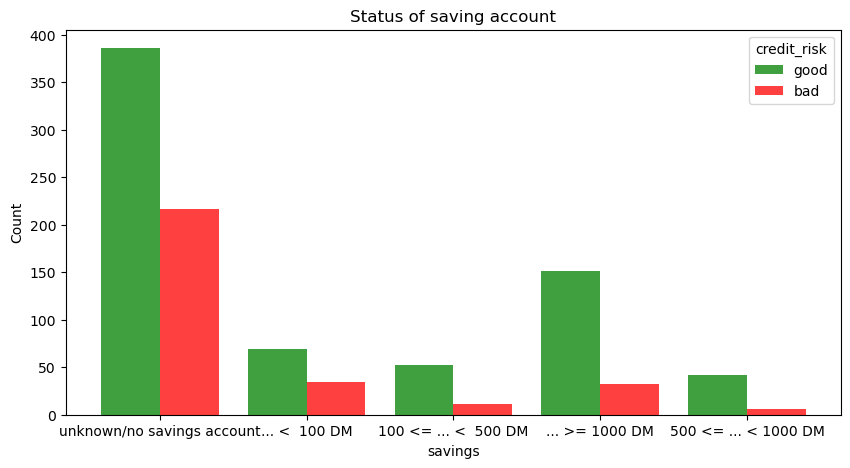

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data = data, x='savings', hue="credit_risk", multiple="dodge", shrink=.8, palette = ['g', 'r'], linewidth = 0).set(title='Status of saving account')

In [17]:
data['savings'].value_counts()

unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: savings, dtype: int64

Мы наблюдаем пик как положительных, так и отрицательных кейсов у тех, у кого нет сберегательного счёта или об этом нет информации, однако это вновь объясняется несбалансированностью выборки. Самые безопсаные заёмщики с самым большим сберегательным счётом, однако интересно, что они же при этом не являются не самыми небезопасными (у них не самый маленький красный пик). Из-за этой неоднозначности, стоит включить в модель положительный коэффициент при сберегательном счёте, однако меньший, чем при рассчётном счёте. Примерно одинково распределение людей со всеми остальными значениями по размеру сберегательного счёта и оно встраивается в логику "чем больше счёт, тем ниже риск".

С точки зрения написания кода, гистограмма в seaborn гораздо менее трудозатратна, можно сравнить трудозатратность по количеству строк кода, которое потребовалось. Кроме того, она удобнее и для интерпретации, поскольку красные и зелёные пики расположены рядом и их проще сравнивать по размеру.

Ещё один важный вывод, который мы можем сделать по обоим графикам - коэффициенты должны быть достаточно большими, чтобы компенсировать влияние того, что как по сберегательным, так и по рассчётным счетам, у нас больше наблюдений, относящихся к категории "неизвестно" по сравнению с остальными категориями.

[Text(0.5, 1.0, 'Saving account and age')]

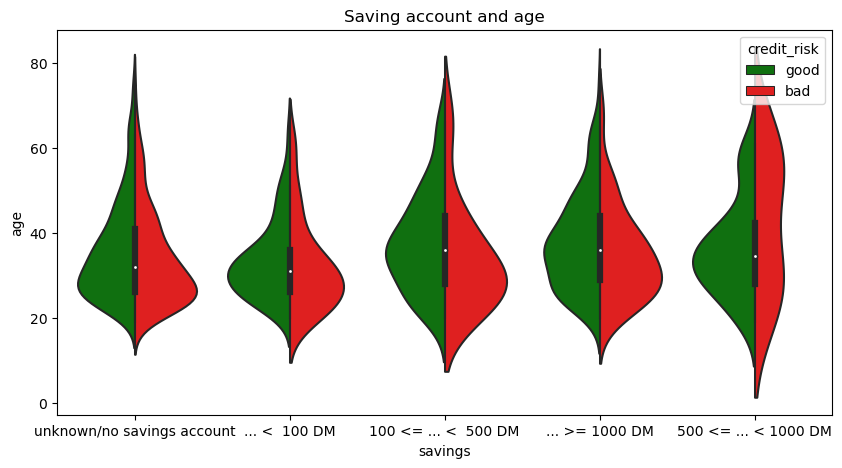

In [18]:
plt.figure(figsize=(10, 5))
sns.violinplot(data = data, x = 'savings', y = 'age', hue = 'credit_risk', split = True, palette= ['g', 'r']).set(title='Saving account and age')

Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту.

Что касается возраста, судя по графику, он не сильно влияет на распределение в зависимости от размера счёта, пики у всех графиков с обоих сторон каждой скрипки находятся в районе 30 лет. Кроме того, мы видим, что распределение почти везде не похоже на нормальное, особенно ярко это показывает график "500 <= ... <= 1000", плохой риск в этой категории очень равномерно распредён по всем возрастам, потому что в принципе богатые люди вне зависимости от возраста скорее надёжные клиенты. Три правых распределения, как хороших, так и плохих заёмщиков, характеризуются достаточно высокой дисперсией. Судя по этим графикам, возраст практически не оказывает влияния на надёжность или ненадёжность клиента.

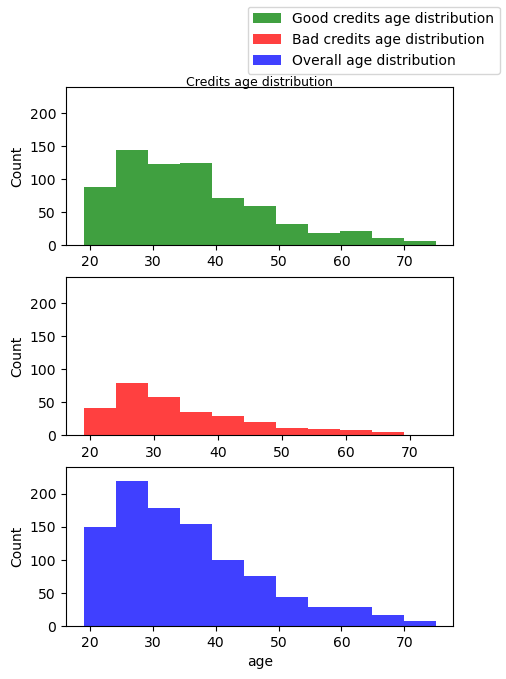

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(5, 7))
bad = data[data['credit_risk'] == 'bad']
good = data[data['credit_risk'] == 'good']
ax[0].set_ylim([0, 240])
ax[1].set_ylim([0, 240])
ax[2].set_ylim([0, 240])
sns.histplot(data=good, x="age", bins= 11, color="g", ax=ax[0], linewidth = 0)
sns.histplot(data=bad, x="age", bins= 11, color="r", ax=ax[1], linewidth = 0)
sns.histplot(data=data, x="age", bins= 11, color="b", ax=ax[2], linewidth = 0)
fig.legend(labels = ['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'])
plt.title('Credits age distribution', y=3.355, fontsize = 9)
plt.show()

По гистограммам видно, что наблюдений по всем возрастам больше среди надежных клиентов. Заметим, что на всех трёх графиках самый высокий пик находится на 25-27 годах, эти люди в целом чаще берут кредиты - их больше как по положительным, так и по отрицательным случаям. Заметим, что более надёжными считаются заёмщики 35-40 лет, на верхнем графике по этим значениям мы наблюдщаем пик, что не повторяет динамину по всем наблюдениям вместе. На зелёном графике также заметим небольшой пик на значении возраста 60-65 лет. В целом, мы не можем сказать, что возраст связан надёжностью клиента.

Построим диаграмму рассеяния.

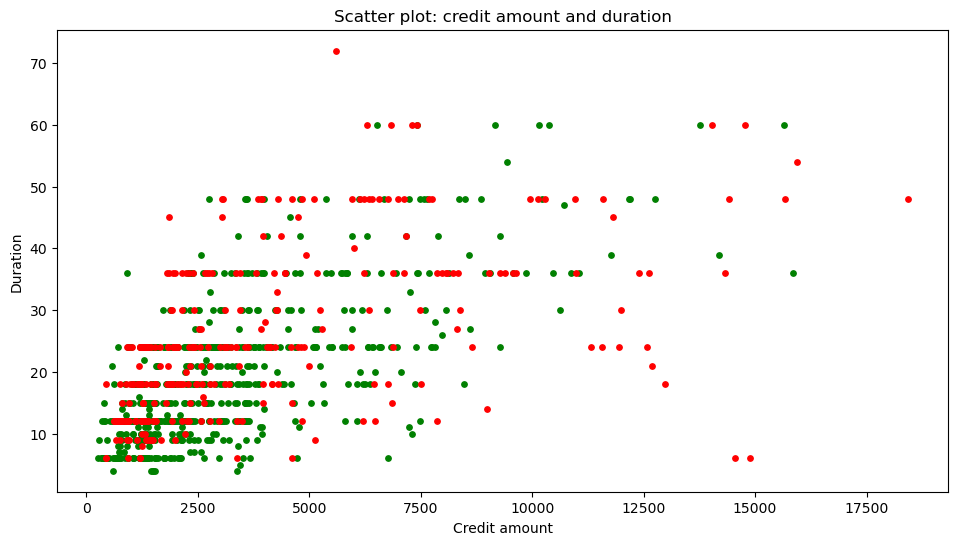

In [21]:
fig, ax = plt.subplots(figsize=(11.5, 6))
plt.title('Scatter plot: credit amount and duration')
bad = data[data['credit_risk'] == 'bad']
good = data[data['credit_risk'] == 'good']
ax.scatter(x = good['amount'], y = good['duration'], color = 'g', s = 15)
ax.scatter(x = bad['amount'], y = bad['duration'], color = 'r', s = 15)
plt.xlabel("Credit amount")
plt.ylabel("Duration")

plt.show()

Рассмотрим диаграмму рассеяния. Мы видим, что размер кредита и продолжительность скореллированы между собой, но не слишком сильно - точки не скучены вокруг прямой, есть выбросы. На небольших значениях размера кредита положительная связь более сильная, чем на больших. Однако для нашей задачи - кредитного скоринга - нас больше интересует сравнение распределения положительных и отрицательных кейсов. Мы видим, что ненадёжные заёмщики чаще берут большие кредиты по сравнению с надёжными заёмщиками. При этом, только среди ненадёжных заёмщиков есть случаи большой суммы кредита на маленький срок. Мы также видим один сильный выброс - небольшой кредит на очень большой срок, этот клиент тоже считается ненадёжным. Данные по надёжным клиентам в целом более сильно скоррелированы, то есть для надёжных заёмщиков справедливо утверждение "чем больше размер кредита, тем больше срок". Учитывая эти тенденции, можно сказать, что для задачи предсказания надёжности клиента в модель стоит включить переменные, отвечающие за размер кредита и продолжительность с небольшими отрицательными коэффициентами.

Text(0.5, 0, 'Age')

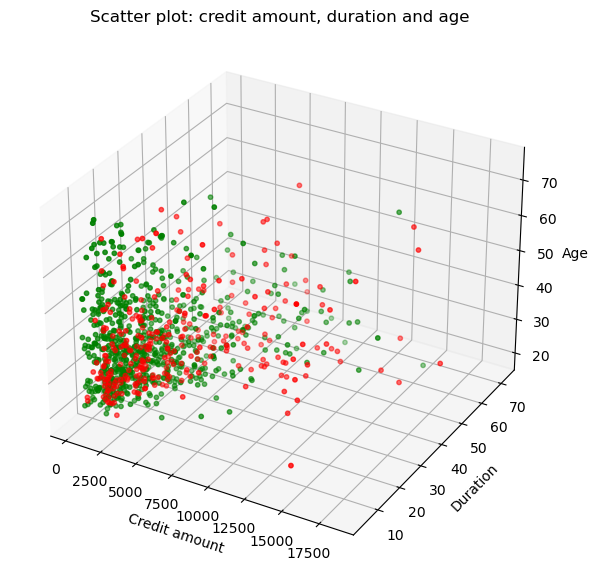

In [23]:
fig = plt.figure(figsize = (10, 7))
bad = data[data['credit_risk'] == 'bad']
good = data[data['credit_risk'] == 'good']
ax = plt.axes(projection ="3d")
ax.set_title("Scatter plot: credit amount, duration and age")
ax.scatter3D(xs = good['amount'], ys = good['duration'], zs = good['age'], color = 'g', s = 10)
ax.scatter3D(xs = bad['amount'], ys = bad['duration'], zs = bad['age'], color = 'r', s = 10)
plt.xlabel("Credit amount")
plt.ylabel("Duration")
ax.set_zlabel('Age')

На трехмерном графике видим, что сопряженность между размером кредита и длительностью сохранилась, это станет понятно, если посмотреть на нижнюю плоскость нашего графика. При этом, возраст не связан отчётливо с размером кредита или длительностью, точки на графике не кучкуются вокруг прямой в трёхмерном пространстве. Кроме того, как и показывали гистограммы выше, возраст не сопряжен с надёжностью клиента.

Представим порядковые и бинарные признаки в виде числовых значений и избавимся от категориальных признаков.

Итак, порядковыми мы считаем те признаки, для которых очевиден порядок для задачи кредитного скоринга. Так, например, хоть признак "кредитная история" вне контекста задачи является категориальным, при рассмотрении его с точки зрения кредитного скоринга становится очевидно, что людям с хорошей кредтной историей будут чаще давать кредиты, поэтому значения этого признака можно расположить в определённом порядке.

Мы не используем кодирование с помощью label encoding, поскольку такое кодирование не в полной мере отражает порядок значений для данных признаков. Например, для признака состояние рассчётного счёта label encoding присваивает самое большое значение 4 значению "нет рассчётного счёта", хотя содержательно, если рассчётного счёта у клиента нет, то вряд ли его можно считать надёжным заёмщиком. Аналогичная ситуация и с признаком "состояние сберегательного счёта". По этой причине кодировать необходимо вручную.

Рассмотрим самые интересные переменные. Для status и savings мы присваиваем 0 значениям "no account", а все остальные располагаем в арифметическом порядке. Для признака credit_history мы предлагаем слудующую кодировку: критическому значению присвоим 0, тем, кто ранее задерживал платёж - 1, тем, кто пока вылачивает кредит без задержек - 2, поскольку мы точно не знаем, будет ли продолжаться эта тенденция. no credits taken/all credits paid back duly присваемваем значение 3, поскольку для некоторых клиентов мы не обладаем полнотой информации об их добросовестности. 4 же получает знаечние all credits at this bank paid back duly, посокольку мы располагаем точной информацией, что все кредиты были вовремя выплачены.

Признак собственность закодируем по стоимости собственности, богатые клиенты обычно более надёжные заёмщики. Признак "количество кредитов" закодируем в обратном арифметическом порядке, потому что человеку будет тяжелее вылатить новый кредит параллельно с ещё несколькими существующими. Признак job закодируем по уровню квалификации.

Удалим из таблицы категориальные признаки. Также удалим из таблицы бинарные признаки телефон и количество отвественных, поскольку их влияние на кредитный риск крайне неоднозначно. Другие переменные мы считаем категориальными, поскольку не можем расставить их в единственном однозначном порядке.

In [25]:
data['status'] = data['status'].replace({'no checking account': 0, '... < 0 DM': 1, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year': 3})
data['savings'] = data['savings'].replace({'unknown/no savings account': 0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4})
data['credit_history'] = data['credit_history'].replace({'critical account/other credits elsewhere': 0, 'delay in paying off in the past': 1, 'existing credits paid back duly till now': 2, 'no credits taken/all credits paid back duly': 3, 'all credits at this bank paid back duly': 4})
data['employment_duration'] = data['employment_duration'].replace({'unemployed': 0, '< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4})
data['installment_rate'] = data['installment_rate'].replace({'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35': 2, '>= 35': 3})
data['present_residence'] = data['present_residence'].replace({'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3})
data['property'] = data['property'].replace({'unknown / no property': 0, 'building soc. savings agr./life insurance': 1, 'car or other': 2, 'real estate': 3})
data['number_credits'] = data['number_credits'].replace({'1': 3, '2-3': 2, '4-5': 1, '>= 6': 0})
data['job'] = data['job'].replace({'unemployed/unskilled - non-resident': 0, 'unskilled - resident': 1, 'skilled employee/official': 2, 'manager/self-empl./highly qualif. employee': 3})
data['foreign_worker'] = data['foreign_worker'].replace({'no': 0, 'yes': 1})
data['credit_risk'] = data['credit_risk'].replace({'bad': 0, 'good': 1})
data.drop(columns = ['purpose', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing', 'people_liable', 'telephone'], inplace = True)
data.head()

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,property,age,number_credits,job,foreign_worker,credit_risk
0,0,18,4,1049,0,1,0,3,2,21,3,2,0,1
1,0,9,4,2799,0,2,2,1,0,36,2,2,0,1
2,1,12,3,841,1,3,2,3,0,23,3,1,0,1
3,0,12,4,2122,0,2,1,1,0,39,2,1,1,1
4,0,12,4,2171,0,2,0,3,2,38,2,1,1,1


На основе проведённого исследования данных попробуем подобрать формулу, связывающую надежность заёмщика с получившимися предикторами. На гистограммах мы заметили зависимость credit risk от размера сберегательного и рассчётного счёта, эти предикторы однозначно следует включить в нашу модель. Кроме того, важнам предиктором для кредитного скоринга явяляется кредитная история. Скорее всего на ответ также повлияет и время, на которое выдаётся кредит - однако, чем меньше срок, тем с большей вероятностью клиент вернёт кредит, поэтому продолжительность будет включена в модель с отрицательным весом.

По ходу работы было сделано еще несколько важных замечаний относительно весов. 1. Из-за несбалансированности выборки веса для переменных сберегательного и рассчётного счёта должны быть достаточно большими, чтобы компенсировать превалирующие в данных нули, потому что связь ненулевых переменных с кредитным риском значительна. 2. Отрицательные веса получат переменные duration и amount. При этом вес duration будет меньше, потому что, как показала диаграмма рассеяния, ненадёжные заёмщики чаще берут кредиты на большой срок. Вес у amount будет больше, но всё ещё отрицательный, поскольку связь неочевидна. 3. Присвоим положительный вес переменной кредитная история, но учитывая не слишком сильную несбалансированность этого столбца, поставим не очень большой вес. 4. Мы не будем использовать константу - в нашем случае она должна быть равна нулю. Мы исходим из предположения, что если переменные принимают нулевые значения, то зависимая переменная должна принять значение 0, то есть перед нами ненадёжный заёмщик, значит константа в модели не нужна. 5. Данные нужно нормализовать, поскольку все они приведены в разных шкалах, для этого мы воспользовались l2 нормой.

В результате нескольких экспериметнов мы пришли к следующему вектору весов: [100, -3, 10, -0.003, 70]. Он даёт самые высокие результаты accuracy_score. При использовании на "тестовой" выборке мы получили точность 0.736. Применив функцию к "обучающей" выборке, мы получили результат 0.7413.

In [27]:
import numpy as np
from sklearn import preprocessing

In [28]:
def predict(X_test: np.array) -> np.array:
    X_test = np.delete(X_test, np.s_[5:13], 1)
    X_test = preprocessing.normalize(X_test)
    ans = X_test.dot(np.array([100, -3, 10, -0.003, 70]))
    return np.where(ans > 0, 1, 0)
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


accuracy_score(predict(X_test), y_test)

C:\Users\suppo\AppData\Local\Temp\ipykernel_12216\2306519288.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.736

In [29]:
accuracy_score(predict(X_train), y_train)

0.7413333333333333